<a href="https://colab.research.google.com/github/victor-roris/ML-learning/blob/master/ComputerVision/TextRecognition_PyTesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTesseract - OCR from image

Optical Character Recognition (OCR) can be used for extract text from an image. Tesseract is the most open-source software available for OCR. Since 2006 it is developed by Google. Python-tesseract is a wrapper for Google’s Tesseract-OCR Engine. 

**Pros:**
 - Easy to use
 - Fast Detection
 - Most Popular
 - Most efficient
 - Support 100+ Language
 - Oldest OCR Library
 - Command-line support

**Cons:**
 - Only works on CPU
 - Doesn’t perform well on Blur, Noisy and colorful image
 - Performance decrease for lower font size in low-resolution images
 - Doesn’t work well on complex Forms

   > Note: For Blur, Noisy and colorful image we need to follow some image-processing steps like making image black and white, remove salt and pepper noise using lowpass filters such as averaging filters or Gaussian Filter, We can also make blur image sharpen by using Highpass filter such as Sobel filters. This Image Processing operation can also be implemented by the OpenCV library in python.

Extracted from: https://bhadreshpsavani.medium.com/how-to-use-tesseract-library-for-ocr-in-google-colab-notebook-5da5470e4fe0 

## Install

In [ ]:
!sudo apt install tesseract-ocr
!pip install pytesseract

## Import

In [3]:
import pytesseract
import shutil
import os
import random
import os, json, cv2, random
from google.colab.patches import cv2_imshow
try:
 from PIL import Image
except ImportError:
 import Image

## General instructions

### Text Extraction

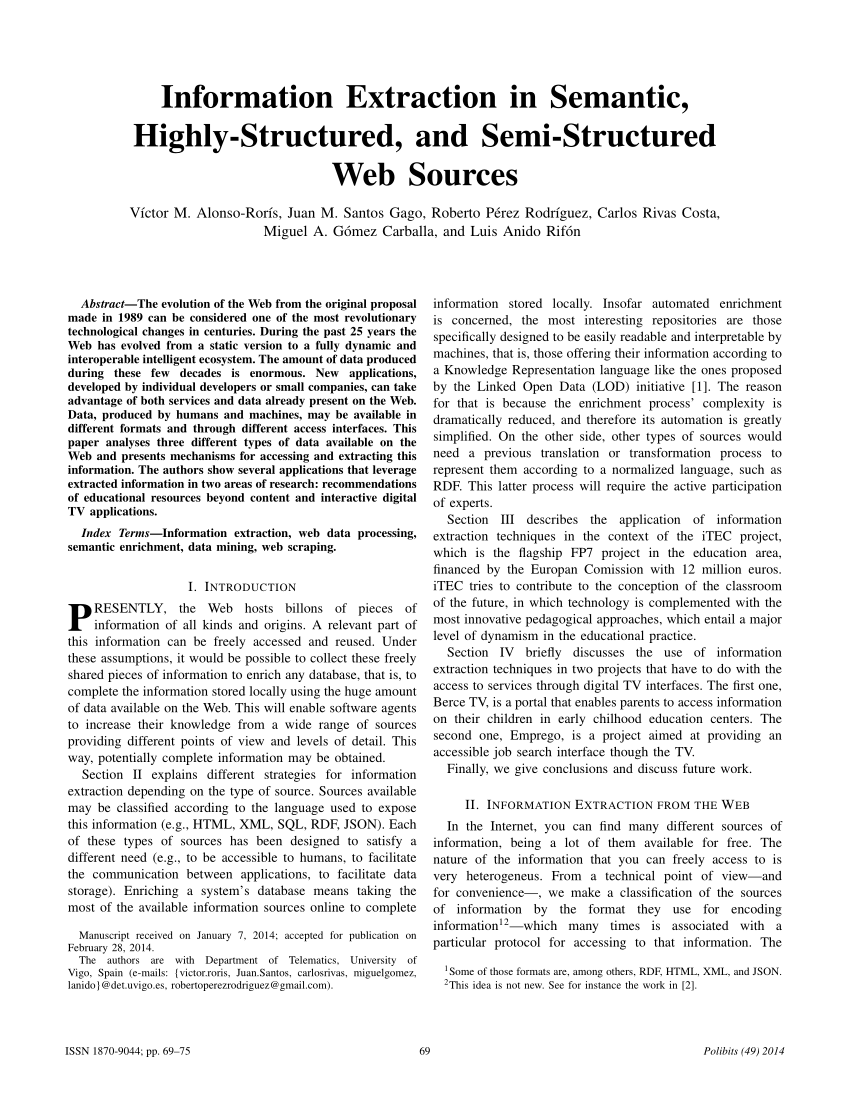

In [4]:
image_path_in_colab="./input.jpg"

!wget https://i1.rgstatic.net/publication/265172391_Information_Extraction_in_Semantic_Highly-Structured_and_Semi-Structured_Web_Sources/links/5d9a4cb3a6fdccfd0e7ef333/largepreview.png -q -O {image_path_in_colab}
# !wget https://fmforums.com/uploads/attachments/monthly_2016_11/invoices-scanned.png.f7d56182dc3f91bab5114a592f4c6eba.png -q -O {image_path_in_colab}
im = cv2.imread(image_path_in_colab)
cv2_imshow(im)

In [5]:
extractedInformation = pytesseract.image_to_string(Image.open(image_path_in_colab))
print(extractedInformation)

Information Extraction in Semantic,
Highly-Structured, and Semi-Structured
Web Sources

Victor M. Alonso-Roris, Juan M. Santos Gago, Roberto Pérez Rodriguez, Carlos Rivas Costa,
Miguel A. Gémez Carballa, and Luis Anido Rifon

Abstract—The evolution of the Web from the original proposal
made in 1989 can be considered one of the most revolutionary
technological changes in cent ing the past 25 years the
‘Web has evolved from a static version to a fully dynamic and
interoperable intelligent ecosystem. The amount of data produced
during these few decades is enormous. New applications,
developed by individual developers or small companies, can take
advantage of both services and data already present on the Web.
Data, produced by humans and machines, may be available
different formats and through different access

paper analyses three different types of data a
‘Web and presents mechanisms for accessing and extract
information. The authors show several applications that leverage
extracted info

###  Detect Langauge other than English

```python
# French text image to string
extractedInformation = pytesseract.image_to_string(Image.open('test-european.jpg'), lang='fra')
print(extractedInformation)
```

###  Get Bounding Boxes for Text

In [6]:
# Get bounding box estimates
bbestimation = pytesseract.image_to_boxes(Image.open(image_path_in_colab))

In [7]:
nbboxes = 20
print(f"BBox for the first {nbboxes} chars: ")
for bbox in bbestimation.split("\n")[0:nbboxes]:
  print(bbox)
print("...")

BBox for the first 20 chars: 
I 161 992 170 1015 0
n 175 992 185 1008 0
f 193 992 202 1015 0
o 203 992 218 1008 0
r 220 992 233 1008 0
m 234 992 248 1008 0
a 248 992 261 1008 0
t 265 992 277 1008 0
i 281 992 296 1015 0
o 299 992 311 1008 0
n 316 992 333 1008 0
E 346 992 359 1015 0
x 359 992 367 1015 0
t 374 992 384 1008 0
r 389 992 404 1013 0
a 411 992 419 1008 0
c 428 992 436 1008 0
t 442 992 448 1013 0
i 453 992 460 1015 0
o 463 992 476 1008 0
...


### Print Bounding Boxes 

In [8]:
import numpy as np

page_width = im.shape[1]
page_height = im.shape[0]

anno_img = np.ones([int(page_width), int(page_height)] + [3], dtype=np.uint8) * 255

anno_color = [0, 0, 0]


for bbox in bbestimation.split("\n"):
  bbox_meta = bbox.split(" ")
  if len(bbox_meta) != 6:
    continue
  x0 = int(bbox_meta[1])
  y0 = page_height - int(bbox_meta[4])
  x1 = int(bbox_meta[3])
  y1 = page_height - int(bbox_meta[2])
  for x in range(x0, x1):
      for y in range(y0, y1):
          anno_img[x, y] = anno_color
anno_img = np.swapaxes(anno_img, 0, 1)

anno_img_obj = Image.fromarray(anno_img, mode='RGB')
anno_img_obj.save("shadow.jpg")

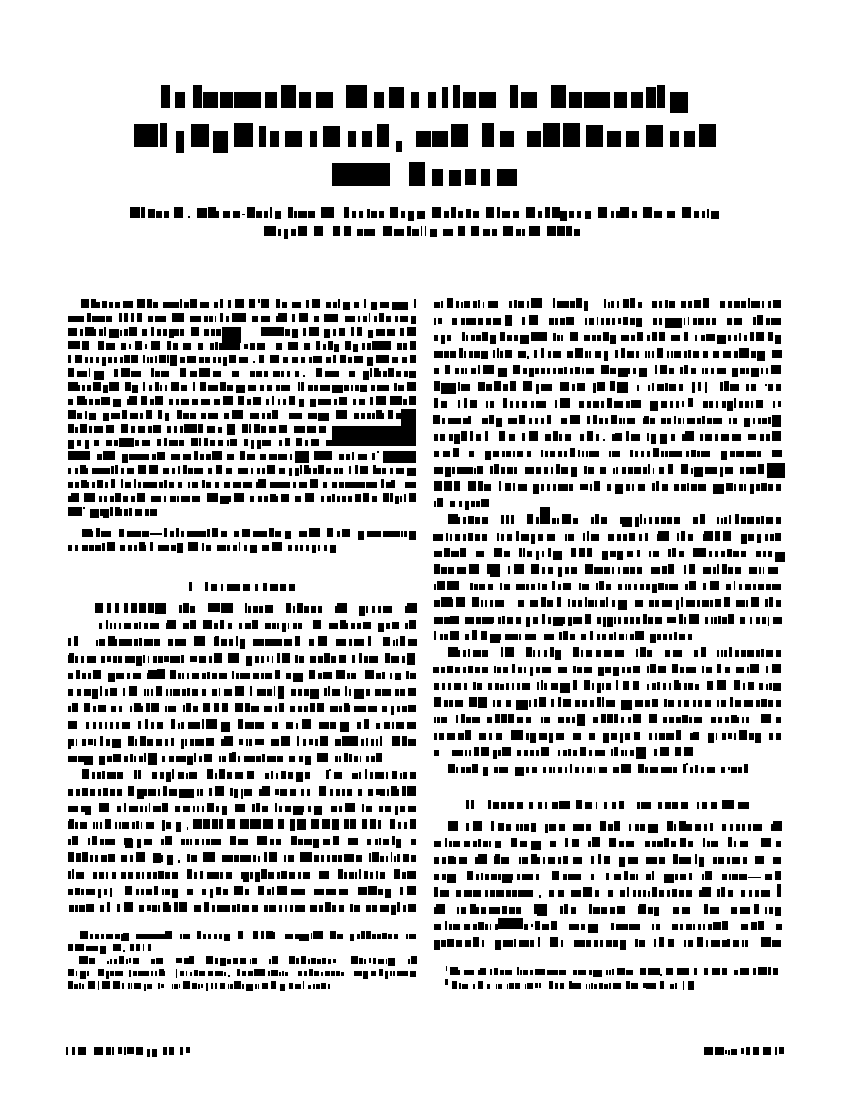

In [9]:
cv2_imshow(anno_img)

## Test Documents

We want to use the same documents of the PDF extracttion libraries. So, we are going to use the PyMuPDF library to generate an image from a PDF.


In [ ]:
!pip install PyMuPDF

In [46]:
from joblib import Memory
from pathlib import Path
# !pip install requests
import requests

path = Path('.')
CACHE_DIR =  path / '.jupyter_cache'
memory = Memory(CACHE_DIR, verbose=0)

# @memory.cache
def download(url, dst):
    response = requests.get(url, allow_redirects=True)
    with open(dst, 'wb') as f:
        f.write(response.content)

In [59]:
import fitz
from PIL import Image
import matplotlib.pyplot as plt

def download_pdf(pdf_url):
  # Download the PDF
  fn = '/content/example.pdf'
  download(pdf_url, fn)
  return fn

def get_page_image(page):
  # 8x default resolution (image text is pretty clear but still not perfect)
  # file size: 1.4 MB
  zoom_xy = (8., 8.)
  mat = fitz.Matrix(*zoom_xy)
  pix = page.getPixmap(matrix=mat)  # use 'mat' instead of the identity matrix

  mode = "RGBA" if pix.alpha else "RGB"
  img = Image.frombytes(mode, [pix.width, pix.height], pix.samples)
  return img

def print_page(img_page):
  # Visualization 
  plt.figure(figsize=(10,20))
  plt.imshow(img_page);

def get_text(pdf_url, page_no=0):
  # Download the PDF
  fn = download_pdf(pdf_url)

  # Load document
  doc = fitz.open(fn)

  # Get first page 
  page = doc[page_no]
  img = get_page_image(page)

  # Visualize text
  print_page(img)

  text = pytesseract.image_to_string(img)

  return text

### Formal document

Articulo Original: Cervera Peris et al

RESUMEN

Objetivo: Implantar un sistema mSalud para la
gestion y trazabilidad de la nutricion parenteral
(NP) domiciliaria.

Método: Estudio descriptivo transversal, siendo
la unidad de analisis las bolsas de NP de admi-
nistracion domiciliaria del Hospital Universitario
son Espases de Palma (HUSE), Espana, duran-
te 3 meses. Las bolsas fueron etiquetadas con
un identificador univoco (etiqueta QR) que faci-
lito su lectura de datos mediante un dispositivo
movil. Las etapas a controlar fueron: validacién
y transcripcion de la prescripcion, preparacion,
conservacion y administracion, siendo los pun-
tos criticos de control el control gravimétrico,
la temperatura de conservacion, el volumen y
tiempo de infusion (bomba de administracién)
y la existencia e integridad del filtro (administra-
clon). La geolocalizacion se realizo a través del
GPS del dispositivo y la visualizacion mediante
un Mash-up de Google Maps.

Resultados: En el proceso intervinier

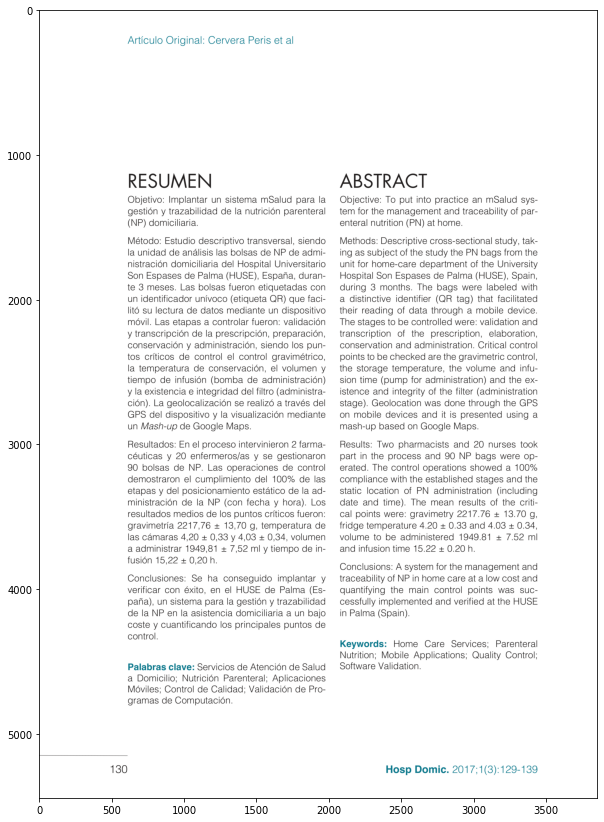

In [60]:
url = 'https://www.revistahad.eu/index.php/revistahad/issue/download/4/5'
text = get_text(url, 11)

print(text)

Q&A: Access to Education

Information for field staff and refugee parents

The following Q&A was produced in accordance with information from the Ministry of Education,
Research, and Religious Affairs’ plan so to ensure better communication with refugee parents and
children staying in Greece.

Accessing in public schools in Greece does not oblige refugees to stay in Greece. Education for refugee
children is available while they stay in Greece and is beneficial to them, as it provides some stability and
normalcy. In addition, documentation of attendance will be provided upon departure from Greece.

Who is eligible?

All children have the right to access school education in Greece, without distinction. The unique condition
for children to attend school is to be vaccinated, which lies under the responsibility of the Greek Ministry
of Health.

The first stage of the Ministry’s programme is focusing on providing access to children between 4-15
years old, who are of compulsory school age — k

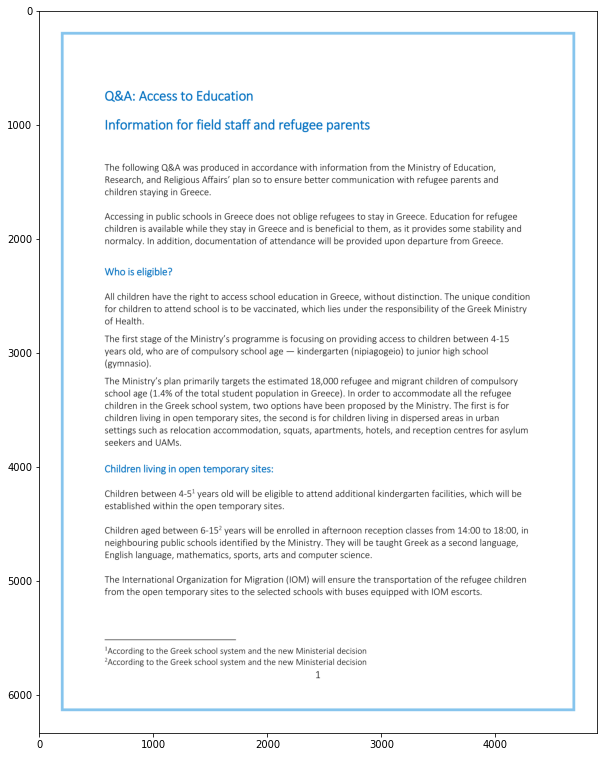

In [61]:
url = 'https://data2.unhcr.org/es/documents/download/52035'
text = get_text(url)

print(text)

OECD STANDARDISED FORMAT FOR AUTOMATIC EXCHANGE
OF INFORMATION FOR TAX PURPOSES

Background

I. Article 26 of the OECD Model Tax Convention allows for tax information to be exchanged by
competent authorities in three ways: on-request, automatically and spontaneously. Information suitable for
automatic exchange is typically bulk information comprising many individual cases of the same type,
usually consisting of details of income arising from sources in the supplying state where such information
is available periodically under that state’s own system and can be transmitted automatically on a routine
basis. Automatic exchange of information requires standardisation of formats in order to be efficient.

2. The OECD’s first step towards standardising the presentation of this type of information resulted
in the design, in 1981, of a paper-based form for use in automatic (routine) exchange. The subsequent
proliferation of electronic data processing capabilities within tax administrations led

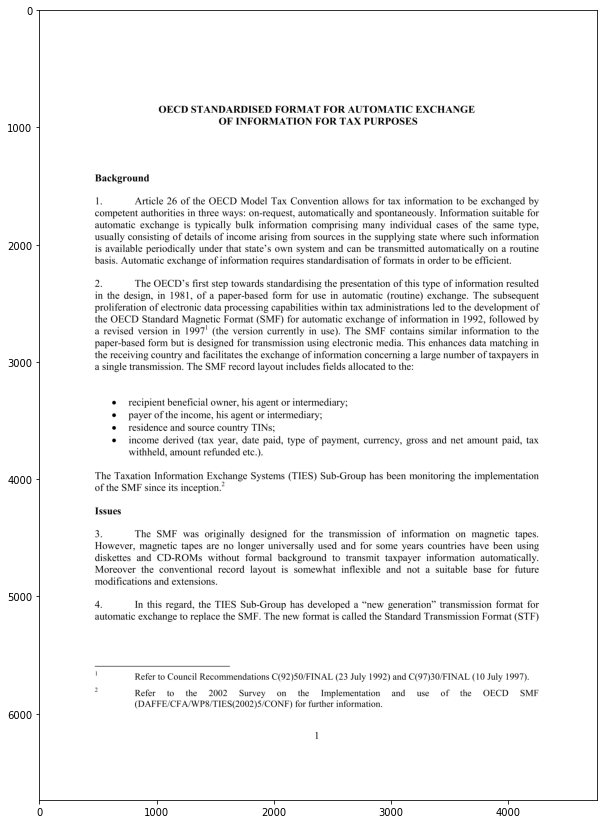

In [62]:
url = 'https://www.oecd.org/tax/exchange-of-tax-information/40501987.pdf'
text = get_text(url)

print(text)

### Extructured: Form, Tables, etc.

Level 1

Transmission
media

Level 2

Encryption

Level 3

Content Format

ANNEX 1

OECD STANDARD FOR EXCHANGE OF INFORMATION IN TAXATION (SEIT)

On-request and spontaneous exchange Automatic exchange
Physical exchange Electronic exchange Physical exchange Electronic exchange

Paper documents

transmitted
normal
commercial

via
mail,

courier, diplomatic

bag etc.

No encryption of

paper documents.

N/A — for
documents.

paper

Email attachment

Standard
Encryption®

Transmission

[see DAFFE/CFA/
WP8/TIES(2003)5/CONF
for encryption and key
management
procedures]

PDF, JPG or TIFF files
for scanned documents.
RTF for electronically
stored documents.’

Magnetic tape, diskette,
CD Rom (or DVD‘)
transmitted via normal
mail, commercial courier,
diplomatic bag etc.

Standard
Encryption
(see footnote 13)

Transmission

[see DAFFE/CFA/
WP8/TIES(2003)5/CONF
for encryption and key
management
procedures]

Standard
Format (SMF);

Magnetic

Or

Standard Transmission
Format (STF)

Email attachment?

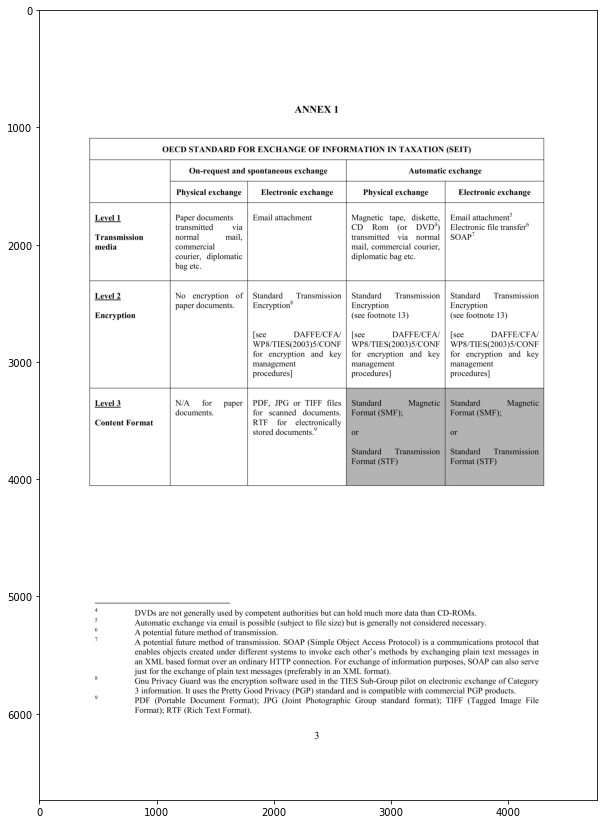

In [63]:
url = "https://www.oecd.org/tax/exchange-of-tax-information/40501987.pdf"
text = get_text(url, 2)

print(text)

Employment Eligibility Verification USCIS

Department of Homeland Security on Ore

U.S. Citizenship and Immigration Services Expires 10/31/2022

 

 

> START HERE: Read instructions carefully before completing this form. The instructions must be available, either in paper or electronically,
during completion of this form. Employers are liable for errors in the completion of this form.

ANTI-DISCRIMINATION NOTICE: It is illegal to discriminate against work-authorized individuals. Employers CANNOT specify which document(s) an
employee may present to establish employment authorization and identity. The refusal to hire or continue to employ an individual because the
documentation presented has a future expiration date may also constitute illegal discrimination.

Section 1. Employee Information and Attestation (Employees must complete and sign Section 1 of Form I-9 no later
than the first day of employment, but not before accepting a job offer.)

Last Name (Family Name) First Name (Given N

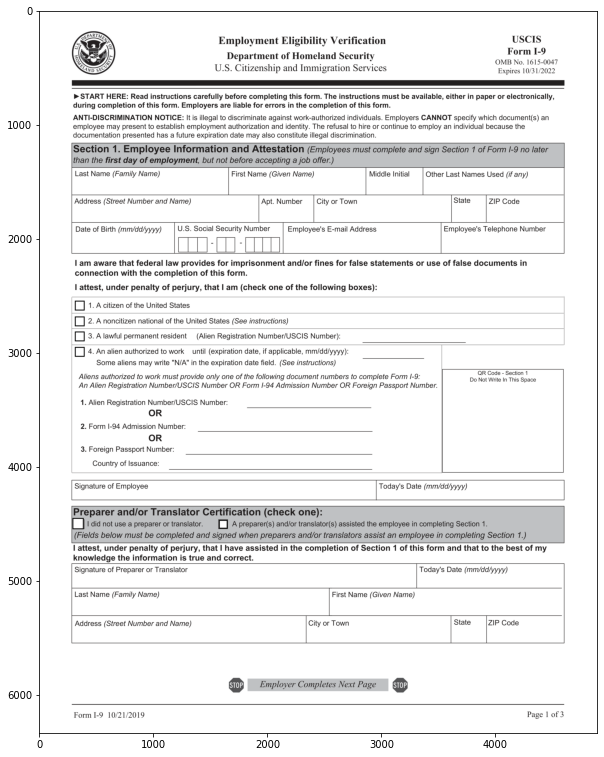

In [64]:
url = "https://www.uscis.gov/sites/default/files/document/forms/i-9-paper-version.pdf"
text = get_text(url)

print(text)

### Colorful

Note: we use `text` output format. That means, the images are not included. To extract images you can use other format as `html`. 

https://dor.mo.gov/drivers/real-id-information/documents/RID.pdf
1.

OooOdoadagqa da a

oO

OoOoOd da

List of Acceptable Documents
» for REAL ID-Compliant

Document Processing:

Applicants must present documents in each of the following categories. Please note that

some documents are eligible to be used as both identity and lawful status verification.

identity

One (1) of these documents with

your full name and date of birth:

Valid, Unexpired U.S. passport

Valid, Unexpired U.S. passport card
Certified U.S. Birth Certificate

US. Birth Abroad

Certificate of Naturalization

Certificate of Citizenship

Valid, Unexpired Permanent Resident Card

Valid Foreign Passport stamped approved
or processed for an I-551

Valid, Unexpired Arrival/Departure Record
I-94 with “Temporary I-551” stamp

Valid, Unexpired Employment Authorization
Document (EAD)

Valid, Unexpired Foreign Passport with a valid,
unexpired US visa accompanied by an I-94

Valid, Unexpired Out of State Real ID driver's
licen

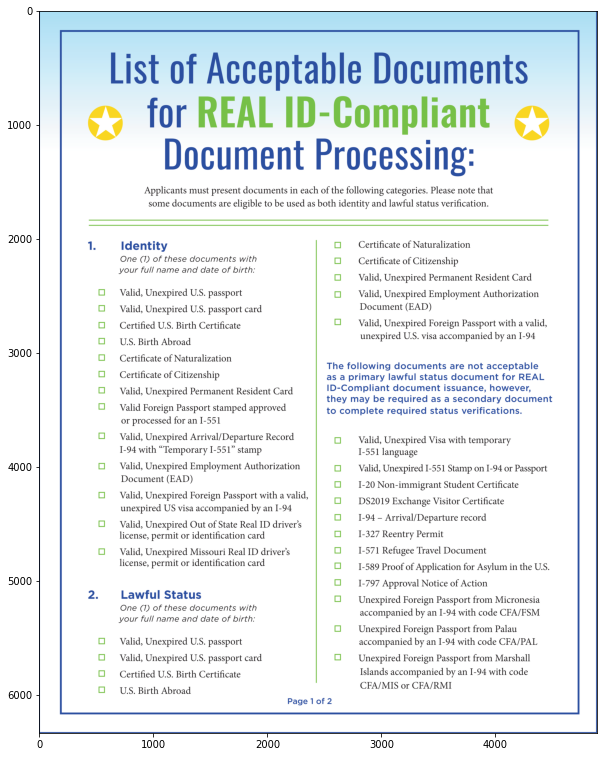

In [53]:
url = "https://dor.mo.gov/drivers/real-id-information/documents/RID.pdf"
text = get_text(url)

print(text)

https://www.oecd.org/tax/exchange-of-tax-information/40501987.pdf
</xsd:annotation>
</xsd:element>
<xsd:element name="OtherlInfo" tyoe="OtherInfo_Type">
<xsd:annotation>
<xsd:documentation>Any other information regarding this STF-Direct element, e.g. errors when transforming
from SMF, Filler info from SMF-Records</xsd:documentation>
</xsd:annotation>
</xsd:element>
</xsd:sequence>
<xsd:attribute name="version" fixed="1.0"/>
</xsd:complexType>
<xsd:element name="STF_OECD">
<xsd:complexT ype>
<xsd:sequence>
<xsd:element name="MessageSpec" type="MessageSpec_Type"/>
<xsd:element name="STF_DIRECT" type="STF_Direct_ Type" maxOccurs="unbounded"/>
</xsd:sequence>
<xsd:attribute name="version" fixed="1.0"/>
</xsd:complexType>
</xsd:element>
</xsd:schema>

Collection of general STF datatypes: Schema stftypes

<?xml version="1.0" encoding="UTF-8"?>
<xsd:schema targetNamespace="urn:oecd:ties:stf:v1" xmins="urn:oecd:ties:stf:v1"
xmins:xsd="http://www.w3.org/2001/XMLSchema" elementFormDefault="quali

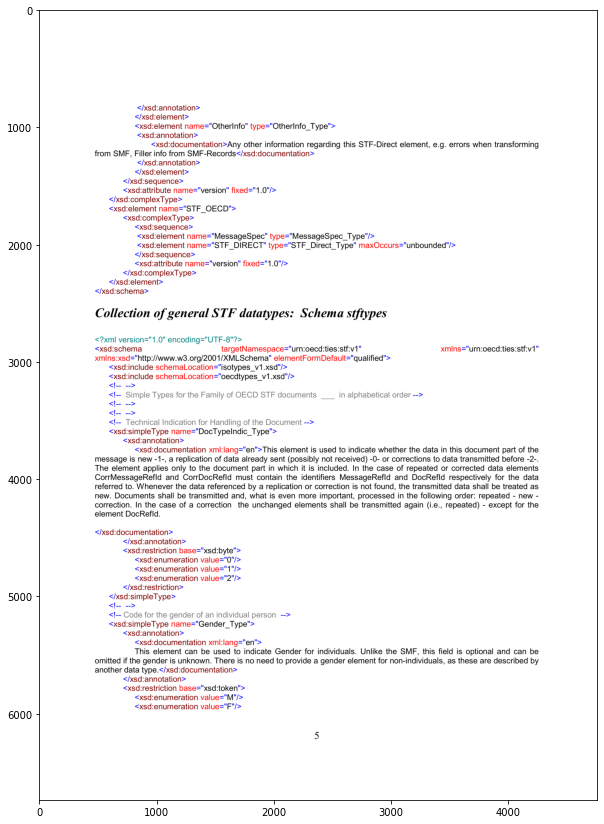

In [54]:
url = 'https://www.oecd.org/tax/exchange-of-tax-information/40501987.pdf'
text = get_text(url, 4)

print(text)

https://www.hpl.hp.com/techreports/2005/HPL-2005-67.pdf
As an example, let us consider a date. Dates can be included in RDF using the
Gregorian date datatype from XML Schema, this then needs to be correctly formatted
for the user locale before display.

In our knowledge base, we may have a triple like:

  

http://www.example.org/terms/creation-date

 

The value ”1999-08-16”*%*xsd: date, indicates the Gregorian date.

Java code, using Jena, that formats this date for the French locale, could include the
following snippet:

Model model = ModelFactory.createDefaultModel ();
// vcead in RDF graph from Web

String url = "http://www.example.org/";

Resource index = model.getResource (urlt+"index. html");

Property creationDate =

model.createProperty (url+"terms/creation-date") ;

// Extract date from triple store.

XSDDateTime date = (XSDDateTime) index.
getProperty(creationDate).
getLiteral().
getValue();

// Extract java.util.Date from XSDDateTime.

Date dateToFormat = date.asCalendar()

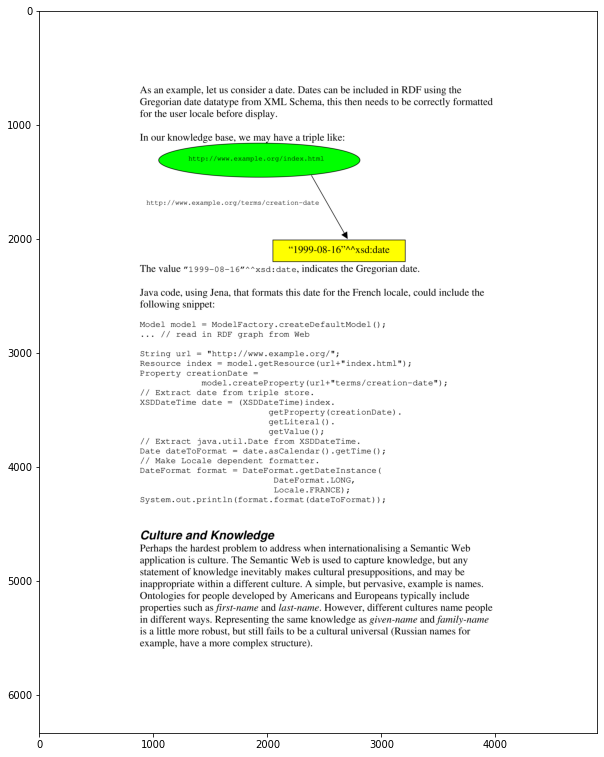

In [55]:
url = "https://www.hpl.hp.com/techreports/2005/HPL-2005-67.pdf"
text = get_text(url, 9)

print(text)

https://proyectoqr.umh.es/files/2016/05/2016-A-Telematic-Based-Approach-Towards-the-Normalization-of-Clinical-Praxis.pdf
A Telematic Based Approach Towards the Normalization of Clinical Praxis 663

sense, the system enables the generation of audit reports and real-time filtering of
historical traces. It also allows the generation of human-friendly reports (e.g.,
graphics) with the extracted information. Based on this, managers can perform better
analysis and, thus, optimize effort and resources.

GQ &

SERVER

GET URIx INFO

1 List of operations

<—}{ 1 attached to the
r

element

 

OPERATION LIST
[{operationA: description},
foperationB: description},
. operationN, description}]

GET OPERATION DESCRIPTION
{ operationN }

 

   

_) Operation
| description
OPERATION DESCRIPTION vu
[paraml, param2, ..., paramM]
INVOKE OPERATION
fvaluel, value2, ..., valueM] __
- —t y Trace storage
OK 5

 

Fig. 1. Client-server interaction for the invocation of a control operation.

tocp: Conte

   
   

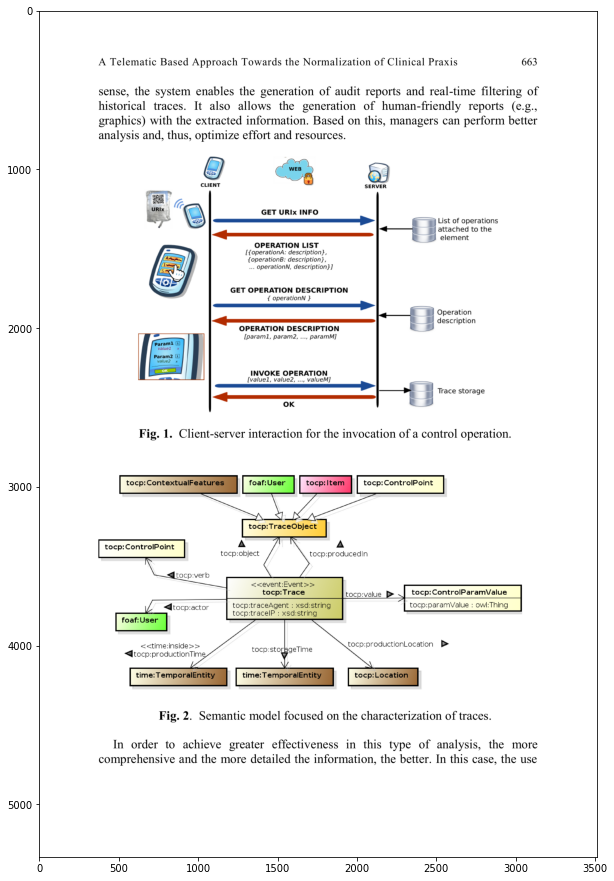

In [56]:
url = "https://proyectoqr.umh.es/files/2016/05/2016-A-Telematic-Based-Approach-Towards-the-Normalization-of-Clinical-Praxis.pdf"
text = get_text(url, 9)

print(text)

### Scanned

https://repositoriotec.tec.ac.cr/bitstream/handle/2238/6872/herramienta_gestion_proyecto_perspectiva_oficina.pdf?sequence=1&isAllowed=y
as i Oe ee
I
| if be ekae

mL re oe oP

CONSTANCIA OE DEFENSA PUBLICA DE
PROYECTO DE GRADUACION

Proyecto de Graduactin defendido piblicamente onta el Tribunal Evaluador,
integrado por los profesores Ing Mauricio Araya Rodriguez, ing Miguel Artavio
AWarado, Ing, Manuel Alan Zofiga. Ing Sonia Vargas Calderén, como requisite
parcial para optar por el grade de Licenciatura en Ingenioda en Constriachon, del
Insitute Tecnologeco de Costa Rica

 

 

)
ier : aor ,
—_———<- Lee jteld lal Chl
ing Mauriclo Araya Rodriguez Ing. Miguel Artavia Alvarado.
Em representacién del Director Profesor Gula
i
Ing Manuel Alan Zuriga. Ing. Sonla Vargas Calderén.
Profesor Lector Profesora Observadora

ocanned by CamScanner



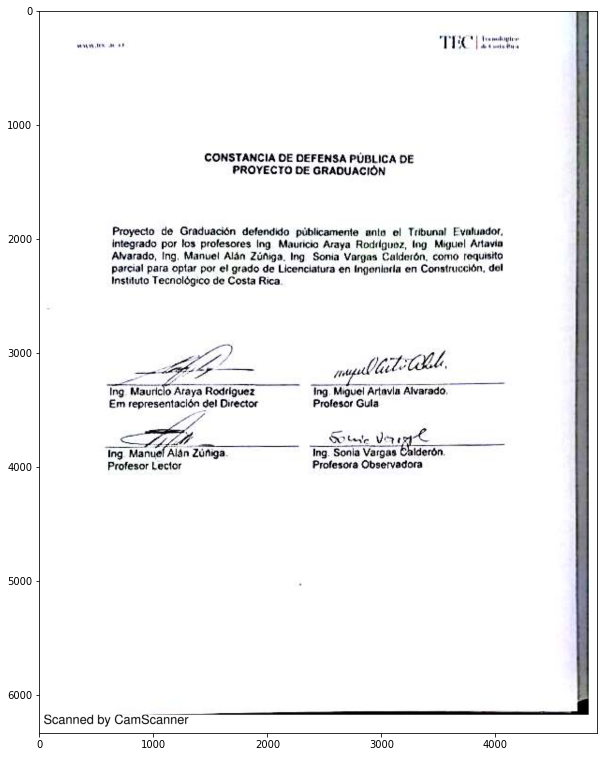

In [57]:
url = "https://repositoriotec.tec.ac.cr/bitstream/handle/2238/6872/herramienta_gestion_proyecto_perspectiva_oficina.pdf?sequence=1&isAllowed=y"
text = get_text(url)

print(text)

https://bibliotecadigital.univalle.edu.co/bitstream/handle/10893/10266/3464-0525605.pdf?sequence=1&isAllowed=y
Anexo No. 4

| VICERRECTORIA ACADEMICA AUTORIZACION PARA PUBLICACION
Division de Bibliotecas DIGITAL DE OBRAS

———a a

or rid
‘eal Yall

 

digital de obras en el

repositorio institucional de Acuerdo a la Politica de Propiedad _Intelectual de la

Universidad del Valle

Actuando en nombre propio los AUTORES o TITULARES del derecho de autor confieren a la
UNIVERSIDAD DEL VALLE una Licencia no exclusiva, limitada y gratuita sobre la obra que sé
integra en el Repositorio Institucional, que se ajusta a Jas siguientes caracteristicas:

a) Estara vigente a partir de la fecha en que se incluye en el Repositorio, por un plazo de cinco
(5) anos, que seran prorrogables indefinidamente por el tiempo que dure el derecho patrimonial
del AUTOR o AUTORES. El AUTOR o AUTORES podran dar por terminada la licencia
solicitando por escrito a la UNIVERSIDAD DEL VALLE con una antelaci6n de dos (2} m

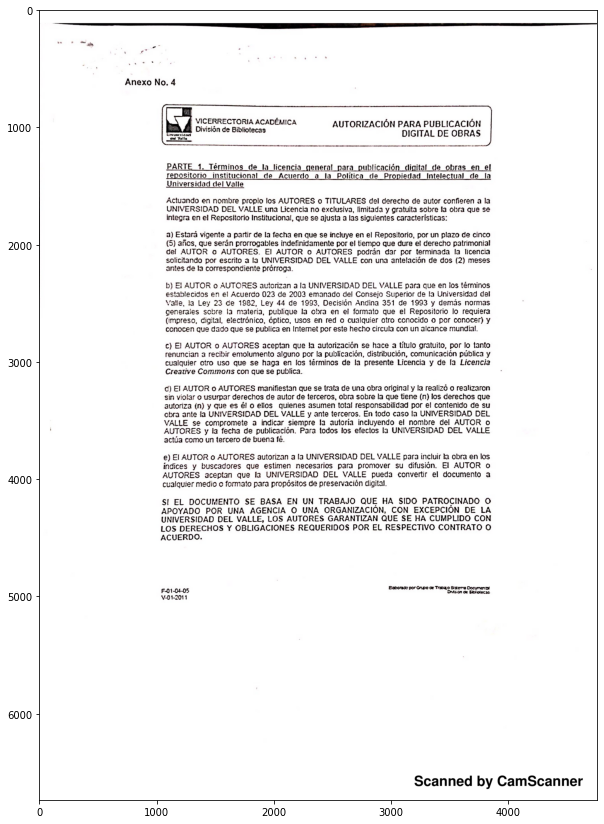

In [58]:
url = "https://bibliotecadigital.univalle.edu.co/bitstream/handle/10893/10266/3464-0525605.pdf?sequence=1&isAllowed=y"
text = get_text(url)

print(text)